### Import Libraries

In [1]:
from wrapper_functions_CAR import *
tf.config.run_functions_eagerly(True)
np.random.seed(10)

C:\Users\Admin-Dell\anaconda3\lib\site-packages\gpflow\experimental\utils.py:42: UserWarning: You're calling gpflow.experimental.check_shapes.decorator.check_shapes which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  warn(
C:\Users\Admin-Dell\anaconda3\lib\site-packages\gpflow\experimental\utils.py:42: UserWarning: You're calling gpflow.experimental.check_shapes.inheritance.inherit_check_shapes which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  warn(


TensorFlow version: 2.11.0. Expected: 2.7.0
TensorFlow Probability version: 0.19.0. Expected: 0.15.0


### Create the fake data



In [2]:
training2010 = pd.read_csv('../data/merged_wp_census_data2_081122.csv')
county_adj = pd.read_csv('../data/countyadj2.csv', index_col = 0)
models = ['pep', 'worldpop']

In [3]:
data_NY, adj_NY = subset_data_by_state(training2010, county_adj, 'New York', 'NY')

# Default Configs

In [4]:
# MCMC configs.
mcmc_step_size=0.1 # @param
mcmc_sample_size=500 # @param
mcmc_num_steps=10_000 # @param
mcmc_burnin=2_500 # @param
mcmc_nchain=10 # @param
mcmc_seed=0 # @param

DEFAULT_MCMC_CONFIG = dict(step_size=mcmc_step_size, 
                           num_steps=mcmc_sample_size, 
                           burnin=mcmc_burnin, 
                           nchain=mcmc_nchain, 
                           seed=mcmc_seed)

#### Running with HMC

In [5]:
mcmc_config = DEFAULT_MCMC_CONFIG.copy()
mcmc_config.update(dict(burnin = 0, num_steps = 12_500, nchain = 5, 
                        kernel_type = 'hmc', step_adaptor_type = 'simple'))
mcmc_config

{'step_size': 0.1,
 'num_steps': 100,
 'burnin': 0,
 'nchain': 5,
 'seed': 0,
 'kernel_type': 'hmc',
 'step_adaptor_type': 'simple'}

In [7]:
phi_true, u_true, data = simulate_data(data_NY[:],
                                       adj_NY[:], 
                                       sim_numbers = False,
                                       scale_down = 1000,
                                       poisson_noise = False,
                                       pivot = -1, 
                                       one_model = False, 
                                       models = models)

fixing tau2 and rho


In [8]:
t0 = time.perf_counter()
CAR_samples, chain_samples, sampler_stat = run_mcmc_CAR(data = data[:],
                                                        adjacency = adj_NY[:],
                                                        pivot = -1,
                                                        models = models,                                                        
                                                        debug_mode = True,
                                                        num_adaptation_steps = 2000,
                                                        **mcmc_config)  
print(time.perf_counter() - t0)

fixing tau2 and rho
when adding in tau2 and rho, need to update the likelihood function!
True
0
-536112.0625...1000
-536154.8125...2000
-536185.8125...3000
-536206.8125...4000
-536220.3125...5000
-536228.6875...6000
-536233.625...7000
-536236.25...8000
-536237.6875...9000
-536238.625...10000
-536239.375...11000
-536240.0625...12000
-536240.8125...13000
-536241.5625...14000
-536242.375...15000
-536243.125...16000
-536243.875...17000
-536244.5625...18000
-536245.1875...19000
-536245.625...Done.
kernel type is hmc
simple step size
100
<function run_chain_CAR.<locals>.trace_fn at 0x0000023A92A4EDC0>
no cache clearing
Acceptance Ratio: 0.9135093092918396
8.436121100000001


In [9]:
pivot_fit = -1
pivot_DGP = -1
res_dict = {'CAR_samples': CAR_samples,
            'chain_samples': chain_samples, 
            'sampler_stat': sampler_stat,
            'phi_true': phi_true, 
            'u_true': u_true, 
            'data': data, 
            'pivot_fit': pivot_fit,
            'pivot_DGP': pivot_DGP, 
            'models': models,
            'mcmc_config': mcmc_config}

Saving and loading Python objects with Pickle

In [10]:
res_dict

{'CAR_samples': [<tf.Tensor: shape=(62, 2, 500), dtype=float32, numpy=
  array([[[-0.24437141,  0.26697296,  0.5750959 , ...,  0.57854486,
           -0.43522316, -0.7578019 ],
          [ 0.26749647,  0.28215072,  0.35252213, ...,  0.635112  ,
           -0.6869465 , -0.805571  ]],
  
         [[ 0.93712187, -1.0481808 , -1.1663705 , ..., -0.17220521,
           -0.08870211, -1.0457368 ],
          [ 0.9953778 , -0.45215577,  0.04179843, ...,  0.12554082,
            0.42086154,  0.759251  ]],
  
         [[ 0.34864882,  0.5227812 , -0.63758546, ..., -0.36421567,
           -0.40471342, -0.08973177],
          [ 0.00694929,  0.883121  , -0.77238524, ..., -1.1096139 ,
           -0.2579519 ,  0.1096094 ]],
  
         ...,
  
         [[-0.59229976, -0.39879933, -0.2877922 , ..., -0.74062836,
            0.15651186, -1.0383697 ],
          [-0.6888586 ,  0.31897107,  0.74529153, ..., -0.9068958 ,
           -0.64388543, -0.31261933]],
  
         [[-0.82998705, -0.2120382 ,  0.09903722

In [ ]:
import pickle

# using local data file because these are too big for github
#local_dir = 'C:/Users/nickl/Dropbox/Nick_Cranston/HSPH/Research/Nethery Project/Data/'
local_dir = 'C:/Users/Admin-Dell/Dropbox/Nick_Cranston/HSPH/Research/Nethery Project/Data/'
with open(local_dir + 'CAR_samples_NY_n10000_realdata_div1000_2models_June132023.pickle', 'wb') as results_file:
  pickle.dump([res_dict, mcmc_config], results_file)

### Loading results and analyzing

In [3]:
local_dir = 'C:/Users/Admin-Dell/Dropbox/Nick_Cranston/HSPH/Research/Nethery Project/Data/'
#local_dir = 'C:/Users/nickl/Dropbox/Nick_Cranston/HSPH/Research/Nethery Project/Data/'
file = local_dir + 'CAR_samples_NY_n10000_realdata_div1000_2models_May152023.pickle'
with open(file, "rb") as input_file:
     #CAR_samples, chain_samples, sampler_stat, mcmc_config, phi_true, u_true, data_sub = pickle.load(input_file)
    res_dict, mcmc_config = pickle.load(input_file)

In [23]:
models = ['acs', 'pep']

## Getting the gradient and likelihood values

In [14]:
res = res_dict['pDGP: -1; pfit: -1']

In [115]:
phi = res[1][0,:,:,:]
data_pivot = res[5][:]
_, target_log_prob_fn = prepare_mcmc_CAR(data_pivot, adj_NY[:], 5, -1, models = ['acs', 'pep'], run_MAP = False)

KeyError: 1

In [114]:
res = pull_gradient_wrapper(phis, target_log_prob_fn)
res

,r,logL,mean_abs_grad
0,1.0,543695.2500,1.251504
1,101.0,543678.0000,1.265566
2,201.0,543740.8125,1.129164
3,301.0,543707.0000,1.201002
4,401.0,543698.6875,1.208107
...,...,...,...
95,9501.0,543680.3125,1.260875
96,9601.0,543703.7500,1.186559
97,9701.0,543710.0625,1.192189
98,9801.0,543693.8125,1.208501


## Getting the rhat and ESS values

In [24]:
stepsize_vec = list()
for key in res_dict.keys():
    sampler_stat = res_dict[key][2]
    stepsize_vec.append(sampler_stat[0][0].numpy())
    
# make the data frame
df_stepsize = pd.DataFrame(np.reshape(np.array(stepsize_vec), (3,3)), 
                       index = ['no pivot DGP','acs pivot DGP','pep pivot DGP'], 
                       columns = ['no pivot fit','acs pivot fit','pep pivot fit'])
df_stepsize

,no pivot fit,acs pivot fit,pep pivot fit
no pivot DGP,0.189046,0.178090,0.181670
acs pivot DGP,0.185321,0.164463,0.189046
pep pivot DGP,0.217303,0.196722,0.200676


In [11]:
## Get the convergence diagnostics from model fits
rhat_vec = []
for key in res_dict.keys():
    #print(key)
    chain_samples = res_dict[key][1]
    u_samples = phi_to_u(chain_samples, res_dict[key][7])
    ESS = tfp.mcmc.effective_sample_size(u_samples, cross_chain_dims = 1).numpy()
    rhat = tfp.mcmc.potential_scale_reduction(chain_samples, independent_chain_ndims=1).numpy()
    print(np.quantile(ESS, [0.5, 0.025, 0.975]))
    print(np.quantile(rhat, [0.5, 0.025, 0.975]))

[5.00000954 5.0000029  5.00011246]
[ 637076.375        44222.35048828 2346028.75625   ]
[ 7.32836008  5.35947452 14.29406428]
[ 3.57142806  1.59050885 14.59372241]
[5.00004983 5.00001287 5.00016375]
[114453.26953125  37444.62558594 428609.503125  ]
[5.04103756 5.01119919 5.18324046]
[134.42417908  17.00161848 765.81586304]
[5.00002766 5.00000587 5.00022035]
[215944.3515625   27592.26240234 874653.6546875 ]
[5.00005627 5.00001404 5.00066663]
[105245.28515625  16535.31437988 399333.59453125]
[5.         5.         5.00000095]
[4.54075100e+07 2.99653667e+06 1.61172217e+08]
[5.0001893  5.00006272 5.00128139]
[31891.19824219  5702.54732666 90513.62363281]
[ 6.56389284  5.37512708 14.11679049]
[ 4.67269111  1.50161809 13.92534544]


## Plotting the density of ensemble weights

In [ ]:
import seaborn as sns
#plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.figsize'] = [15, 3]
labels = models[:]
labels.insert(0, 'none')

fig = plt.figure()
iter = 0

for pivot_DGP in range(-1,0):
    
    iter = iter + 1
    
    u_true = res_dict['pDGP: ' + str(pivot_DGP) + '; pfit: -1'][4]
    
    CAR_df = pd.DataFrame(u_true[0,:,:], columns = models)
    #CAR_df = pd.DataFrame(CAR_ensemble_weights.numpy(), columns = ["acs","pep","worldpop"])

    #plt.subplot(3, 4, iter)
    plt.subplot(1, 4, iter)
    sns.set(style="darkgrid")
    tt = sns.kdeplot(CAR_df['acs'], shade=True, color="r", label = 'acs')
    tt = sns.kdeplot(CAR_df["pep"], shade=True, color="b", label = 'pep')
    #tt = sns.kdeplot(CAR_df["worldpop"], shade=True, color="g", label = 'worldpop')
    if pivot_DGP == -1:
        plt.title('u true')
    plt.ylabel(labels[pivot_DGP + 1])
    plt.xlabel('')
    plt.xlim(0,1)
    
    for pivot_fit in range(-1,2):
        iter = iter + 1
        key = 'pDGP: ' + str(pivot_DGP) + '; pfit: ' + str(pivot_fit)  

        # get the ensemble weights
        CAR_ensemble_phis = tf.reduce_mean(res_dict[key][0][0], axis = 2).numpy()
        u = phi_to_u(CAR_ensemble_phis, pivot = pivot_fit)
        CAR_df = pd.DataFrame(u, columns = models)

        #plt.subplot(3, 4, iter)
        plt.subplot(1, 4, iter)
        sns.set(style="darkgrid")
        tt = sns.kdeplot(CAR_df['acs'], shade=True, color="r", label = 'acs')
        tt = sns.kdeplot(CAR_df["pep"], shade=True, color="b", label = 'pep')
        #tt = sns.kdeplot(CAR_df["worldpop"], shade=True, color="g", label = 'worldpop')
        #plt.legend()
        plt.xlabel('')
        plt.ylabel('')
        if pivot_DGP == -1:
            plt.title(labels[pivot_fit + 1])
        plt.xlim(0,1)
        
plt.legend()
plt.show()

## Plotting scatterplots of the fitted vs true u values

In [6]:
key = 'pDGP: -1; pfit: -1'
phis = res_dict[key][0][0]

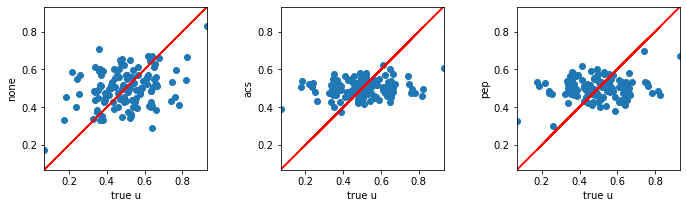

In [9]:
plt.rcParams['figure.figsize'] = [12, 3]
labels = models[:]
labels.insert(0, 'none')

fig = plt.figure()
iter = 0

for pivot_DGP in range(-1,0):
    
    ## Get the true u values
    u_true = res_dict['pDGP: ' + str(pivot_DGP) + '; pfit: -1'][4]
    CAR_df = pd.DataFrame(u_true[0,:,:], columns = models)
    
    for pivot_fit in range(-1,2):
        iter = iter + 1
        key = 'pDGP: ' + str(pivot_DGP) + '; pfit: ' + str(pivot_fit)    

        ## get the ensemble weights
        phi = res_dict[key][0][0]
        
        ## Get the u values from each run
        u = np.empty(shape=(phi.shape[0], 
                              len(models), 
                              phi.shape[2]), 
                       dtype='float64')
        for i in range(phi.shape[2]):
            u[:,:,i] = phi_to_u(phi.numpy()[:,:,i], pivot = pivot_fit)   
            
        CAR_df = pd.DataFrame(np.mean(u, axis = 2), columns = models)

        #plt.subplot(3, 4, iter)
        plt.subplot(1, 3, iter)

        x = np.ndarray.flatten(u_true[0,:,:].numpy())
        y = np.ndarray.flatten(CAR_df.values)
        plt.scatter(x, y)
        plt.xlabel("true u")
        plt.ylabel(labels[pivot_fit + 1])

        plt.xlim([min([min(x), min(y)]), max([max(x), max(y)])])
        plt.ylim([min([min(x), min(y)]), max([max(x), max(y)])])
        ax = plt.gca()
        ax.set_aspect('equal', adjustable='box')

        ## obtain m (slope) and b(intercept) of linear regression line
        m, b = np.polyfit(x, y, 1)
        ## add linear regression line to scatterplot 
        #plt.plot(x, m*x+b, color = 'red')
        ## add y = x line
        plt.plot(x, x, color = 'red')


        from scipy.stats import pearsonr
        pearsonr(x,y)[0]
        
plt.show()

## Plotting the fitted vs true y predictions

In [ ]:
plt.rcParams['figure.figsize'] = [12, 3]
labels = models[:]
labels.insert(0, 'none')

fig = plt.figure()
iter = 0

for pivot_DGP in range(-1,0):
        
    ## Get the data
    data_pivot = res_dict['pDGP: ' + str(pivot_DGP) + '; pfit: -1'][5]
    
    ## Get the true u values
    u_true = res_dict['pDGP: ' + str(pivot_DGP) + '; pfit: -1'][4]
    CAR_df = pd.DataFrame(u_true[0,:,:], columns = models)
    y_exp = tf.reduce_sum(data_pivot[models].values*u_true, axis = 2)[0].numpy()
    
    for pivot_fit in range(-1,2):
        iter = iter + 1
        key = 'pDGP: ' + str(pivot_DGP) + '; pfit: ' + str(pivot_fit)    

        ## get the ensemble weights
        phi = res_dict[key][0][0]
        
        ## Get the u values from each run
        predictions = np.empty(shape=(phi.shape[0], 
                              phi.shape[2]), 
                       dtype='float64')
        for i in range(phi.shape[2]):
            u = phi_to_u(phi.numpy()[:,:,i], pivot = pivot_fit)   
            predictions[:,i] = tf.reduce_sum(data_pivot[models].values*u, axis = 1)
    
        y_pred = np.mean(predictions, axis = 1)
            
        #CAR_df = pd.DataFrame(np.mean(u, axis = 2), columns = models)

        #plt.subplot(3, 4, iter)
        plt.subplot(1, 3, iter)

        x = data_pivot['census']
        y = y_pred
        #y = y_pred.numpy()
        plt.scatter(x, y)
        plt.xlabel("true census values")
        plt.ylabel(labels[pivot_fit + 1])

        #obtain m (slope) and b(intercept) of linear regression line
        m, b = np.polyfit(x, y.astype('float64'), 1)

        plt.xlim([min([min(x), min(y)]), max([max(x), max(y)])])
        plt.ylim([min([min(x), min(y)]), max([max(x), max(y)])])
        ax = plt.gca()
        ax.set_aspect('equal', adjustable='box')
        ax.set_xscale("log")
        ax.set_yscale("log")

        ## obtain m (slope) and b(intercept) of linear regression line
        m, b = np.polyfit(x, y, 1)
        ## add linear regression line to scatterplot 
        #plt.plot(x, m*x+b, color = 'red')
        ## add y = x line
        plt.plot(x, x, color = 'red')
        
plt.show()

## Plotting the chloroploth maps

In [ ]:
# Create the weights dict for plotting the outcomes

weights_dict = {
    "acs": CAR_ensemble_weights[:,0],
    "pep": CAR_ensemble_weights[:,1],
    "worldpop": CAR_ensemble_weights[:,2]
}

color_weights = make_color_norm(
    list(weights_dict.values())[1],   
    method="percentile")

In [ ]:
norm_weights_dict = {
    "acs": u[:,0],
    "pep": u[:,1],
    "worldpop": u[:,2]
}

color_norm_weights = make_color_norm(
    list(norm_weights_dict.values())[1],   
    method="percentile")

In [ ]:
import plotly
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
# df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
#                    dtype={"fips": str})
import matplotlib.colors as colors

import plotly.express as px

In [ ]:
for model_name in models:
    output = pd.DataFrame(np.column_stack([data_sub[["GEOID"]], weights_dict[model_name]]))
    output = output.set_axis(['GEOID', model_name], axis=1)
    output[model_name] = output[model_name].astype(float)
    fig = px.choropleth_mapbox(output, geojson=counties, locations='GEOID', color=model_name,
                           color_continuous_scale="Viridis",
                           #range_color=(0.05,0.07),
                           mapbox_style="carto-positron",
                           #mapbox_style='white-bg',
                           #featureidkey="properties.MWS_ID",
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5#,
                           #labels={'unemp':'unemployment rate'}
                          )
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()

In [ ]:
# pd.concat([data_NY[["GEOID"]].reset_index(drop=True), pd.DataFrame( phi_true[0].numpy(), columns = models)], axis=1)
# pd.DataFrame( phi_true[0].numpy(), columns = models)

In [ ]:
full_phi = pd.concat([data_sub[["GEOID"]].reset_index(drop=True), 
                         pd.DataFrame(phi_true[0].numpy(), columns = models)], 
                        axis=1)

full_u = pd.concat([data_sub[["GEOID"]].reset_index(drop=True), 
                         pd.DataFrame(u_true[0].numpy(), columns = models)], 
                        axis=1)


#full_phi[['GEOID', 'acs']], full_u

In [ ]:
for model_name in models:
    output = full_phi[['GEOID', model_name]]
    fig = px.choropleth_mapbox(output, geojson=counties, locations='GEOID', color=model_name,
                           color_continuous_scale="Viridis",
                           #range_color=(0.05,0.07),
                           mapbox_style="carto-positron",
                           #mapbox_style='white-bg',
                           #featureidkey="properties.MWS_ID",
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5#,
                           #labels={'unemp':'unemployment rate'}
                          )
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()